In [1]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
from data import load_train_val_examples, GAPLabel

In [2]:
model_dir = Path('../output/submission1/trial_1')

train_examples, val_examples = load_train_val_examples(42)
examples = {e.id: e for e in train_examples + val_examples}

results = pd.read_csv(f'{model_dir}/val_predictions.csv')

/home/yasserglez/.pyenv/versions/3.7.2/envs/gendered-pronoun-resolution/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
results.LOSS.describe()

count    446.000000
mean       0.322364
std        0.709210
min       -0.000000
25%       -0.000000
50%        0.067184
75%        0.209600
max        3.667005
Name: LOSS, dtype: float64

In [4]:
labels = [l.name for l in GAPLabel]
y_true = results.LABEL.values
y_pred = [labels[i] for i in np.argmax(results[labels].values, axis=1)]

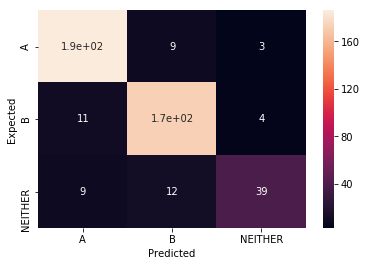

In [5]:
matrix = pd.DataFrame(confusion_matrix(y_true, y_pred), index=labels, columns=labels)
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Expected');

In [6]:
print(classification_report(y_true, y_pred, labels=labels))

              precision    recall  f1-score   support

           A       0.90      0.94      0.92       198
           B       0.89      0.92      0.91       188
     NEITHER       0.85      0.65      0.74        60

   micro avg       0.89      0.89      0.89       446
   macro avg       0.88      0.84      0.85       446
weighted avg       0.89      0.89      0.89       446



In [7]:
PRONOUNS_GENDER = {'she': 'F', 'her': 'F', 'hers': 'F', 'he': 'M', 'him': 'M', 'his': 'M'}

def get_gender(example_id):
    example = examples[example_id]
    pronoun = example.tokens[example.pronoun_index]
    gender = PRONOUNS_GENDER[pronoun.lower()]
    return gender

results['GENDER'] = results['ID'].apply(get_gender)
M_results = results[results['GENDER'] == 'M']
F_results = results[results['GENDER'] == 'F']

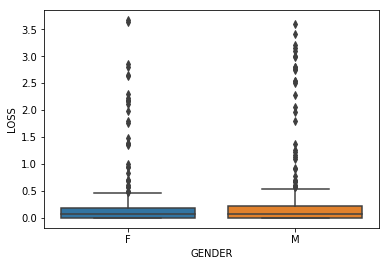

In [8]:
sns.boxplot(x='GENDER', y='LOSS', data=results)

In [9]:
results.groupby('GENDER')['LOSS'].describe()

,count,mean,std,min,25%,50%,75%,max
GENDER,,,,,,,,
F,223.0,0.292766,0.651568,-0.0,-0.0,0.067081,0.192173,3.667005
M,223.0,0.351963,0.762839,-0.0,-0.0,0.067288,0.218737,3.589302


In [10]:
M = M_results['LOSS'].mean()
F = F_results['LOSS'].mean()
F / M

0.8318105812030369

In [11]:
y_true = M_results.LABEL.values
y_pred = [labels[i] for i in np.argmax(M_results[labels].values, axis=1)]
print(classification_report(y_true, y_pred, labels=labels))

              precision    recall  f1-score   support

           A       0.89      0.92      0.90        92
           B       0.89      0.93      0.91        98
     NEITHER       0.84      0.64      0.72        33

   micro avg       0.88      0.88      0.88       223
   macro avg       0.87      0.83      0.85       223
weighted avg       0.88      0.88      0.88       223



In [12]:
y_true = F_results.LABEL.values
y_pred = [labels[i] for i in np.argmax(F_results[labels].values, axis=1)]
print(classification_report(y_true, y_pred, labels=labels))

              precision    recall  f1-score   support

           A       0.92      0.95      0.94       106
           B       0.89      0.91      0.90        90
     NEITHER       0.86      0.67      0.75        27

   micro avg       0.90      0.90      0.90       223
   macro avg       0.89      0.84      0.86       223
weighted avg       0.90      0.90      0.90       223

